In [ ]:
!pip install --pre pyod

In [38]:
# Import important packages
import pandas as pd
import numpy as np

import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

from pyod.models.knn import KNN 

# Import the utility function for model evaluation
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')
# set seed
np.random.seed(123)

In [55]:
def plot_scores(scores,title):
    plt.hist(scores, bins='auto')
    plt.title(title)
    plt.show()

In [46]:
data = pd.read_csv(r"C:\Users\RosaS\Desktop\PRACTICAR ANOMALIAS\DataSetsPracticaAnomalias\sensor1.csv")
data = data.drop_duplicates()
data=data.fillna(0) # pretty important!, The models do not work if there are NaN values
df = data

In [47]:
print(data.columns)
data.shape
data.describe()

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51', 'machine_status'],
      dtype='object')


,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,2.353039,48.140356,53.005918,46.054797,607.458288,74.722010,13.087234,16.156218,15.717741,15.051492,...,41.326118,39.767809,52.795583,48.388533,39.863781,201.626303,82.079480,242.246859,209.720736,0.076923
std,0.444090,1.485823,0.879331,0.968153,101.145303,5.230574,1.637213,0.205876,0.352613,0.198042,...,2.656515,3.509175,6.770249,4.724534,1.813649,46.334777,16.066522,48.612162,21.151477,0.269953
min,0.000000,42.534720,47.699650,41.449650,202.526031,49.792890,3.219039,15.154800,14.185470,13.867190,...,38.281250,34.722220,31.539350,34.432870,33.275460,59.895830,44.560180,0.000000,183.738400,0.000000
25%,2.447194,47.265625,53.125000,46.223960,630.439850,74.234260,13.317420,16.131360,15.653930,15.053530,...,39.583330,37.760415,48.177085,45.717590,39.062500,188.802050,69.733800,241.608800,200.520850,0.000000
50%,2.453588,48.394100,53.125000,46.310760,634.375000,75.773310,13.346350,16.167530,15.697340,15.082470,...,40.885410,39.062500,52.372680,48.900460,39.641200,202.546300,74.363430,246.527800,202.835600,0.000000
75%,2.460474,48.784720,53.168400,46.397568,638.194400,76.958645,13.400610,16.189235,15.794995,15.104165,...,42.057290,40.653935,54.542825,50.925930,40.509260,211.516200,96.498840,250.578700,215.133100,0.000000
max,2.465394,53.342010,53.689240,46.397570,650.463000,80.659490,14.185470,16.890910,16.869210,15.169270,...,51.302080,52.102000,65.682870,67.129630,46.006940,409.143500,121.527800,401.909700,324.652800,1.000000


In [48]:
nullValues = data.isnull().sum() ##Para saber si hay columnas vacias 
answer = 'All its complete' if nullValues.bool else 'Incomplete'
print(answer)

All its complete


In [49]:
data.machine_status.value_counts(normalize=True) # cuenta el numero de cada clase y True es para que retorne el % , se puede cambiar Class
                                        #V1 o Amount

0    0.923077
1    0.076923
Name: machine_status, dtype: float64

<AxesSubplot:>

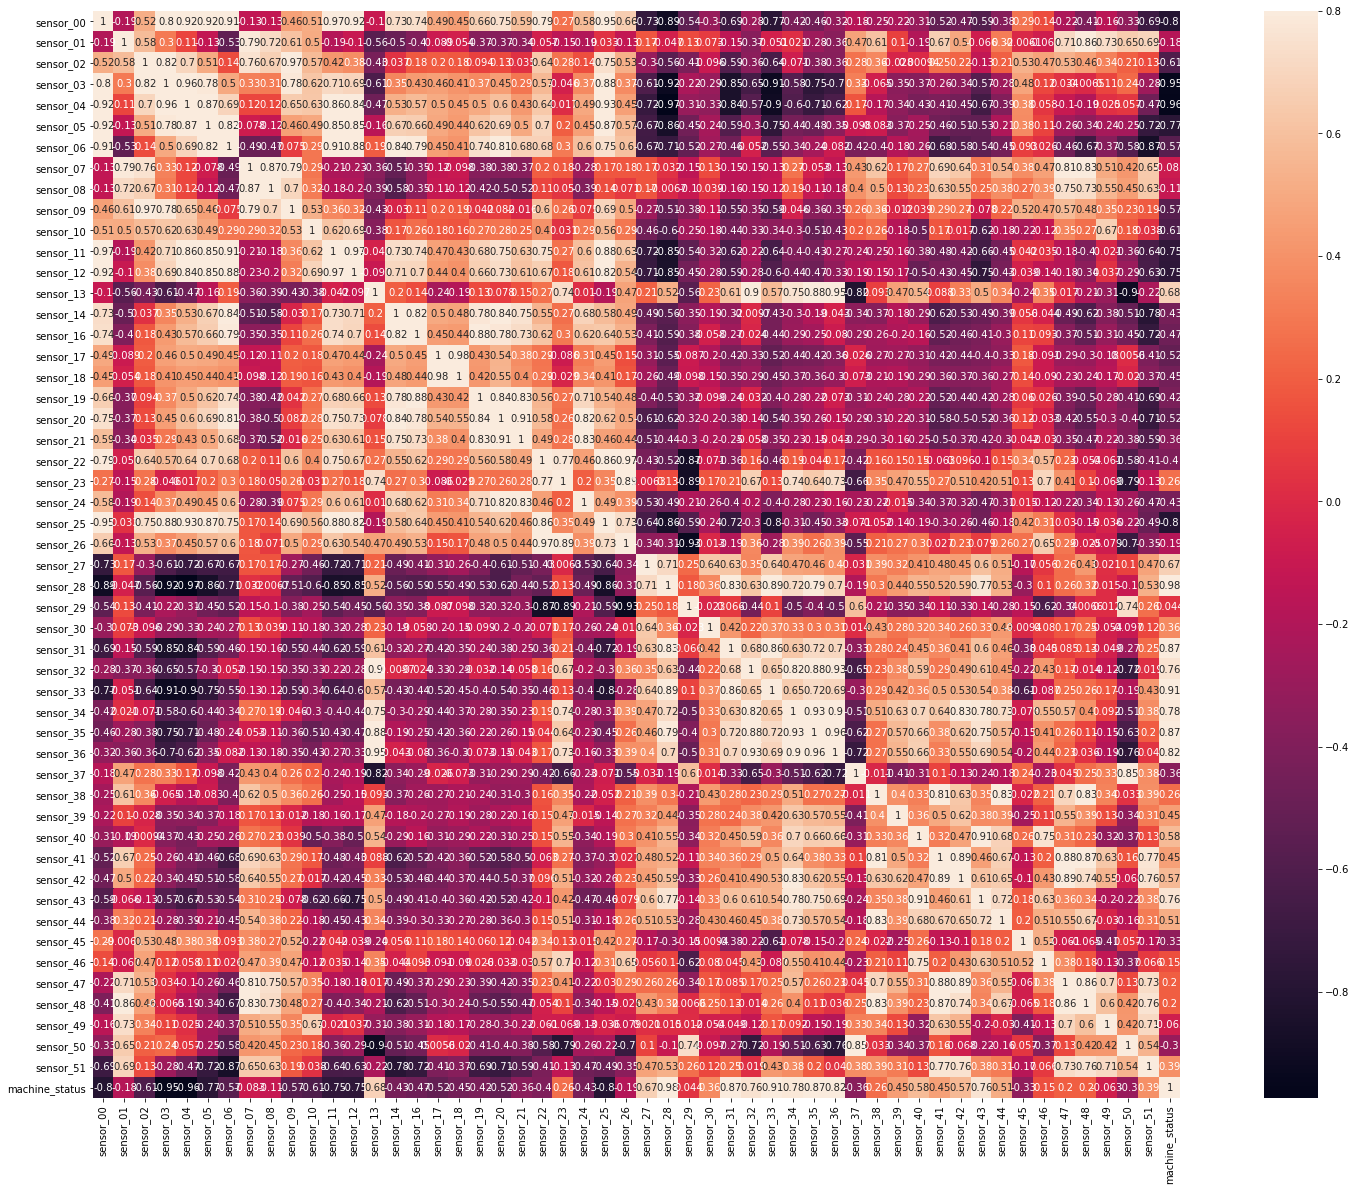

In [50]:
#find the correlation betweeen the variables 
corr = data.corr() 
fig = plt.figure(figsize=(30,20))
sns.heatmap(corr, vmax=.8, square=True,annot=True)

In [51]:
#Normalising the amount column.
#new_data['Amount'] = StandardScaler().fit_transform(new_data['Amount'].values.reshape(-1,1))

# split into independent variables and target variable
X = df.drop(['machine_status'], axis=1) 
y = df['machine_status']

#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.60,test_size=0.40, random_state = 20)

X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test = pd.DataFrame(StandardScaler().fit_transform(X_test))

In [ ]:
# ------------------------------      CREAMOS LOS MODELOS DE KNN         ----------------------------------------------

In [52]:
# create the KNN model
clf_knn = KNN(contamination=0.172, n_neighbors = 5,n_jobs=-1)
clf_knn.fit(X_train)

KNN(algorithm='auto', contamination=0.172, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)

In [53]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf_knn.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf_knn.decision_scores_  # Predict raw anomaly score of X using the fitted detector.

# get the prediction on the test data
y_test_pred = clf_knn.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf_knn.decision_function(X_test)  # outlier scores

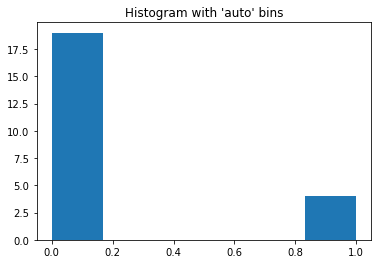

In [56]:
 # histograms
plot_scores(y_train_pred,"Histogram with 'auto' bins")

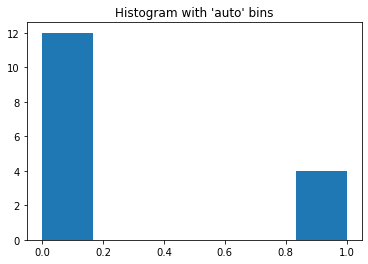

In [57]:
plot_scores(y_test_pred,"Histogram with 'auto' bins")

<AxesSubplot:>

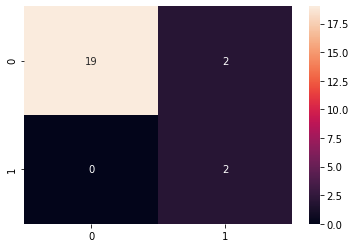

In [58]:
import seaborn as sns
import numpy as np

# plot the comfusion matrix  in the train set 
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix, annot=True)

In [62]:
# Evaluate on the training data
evaluate_print('KNN', y_train,y_train_pred)

KNN ROC:0.9524, precision @ rank n:0.0


<AxesSubplot:>

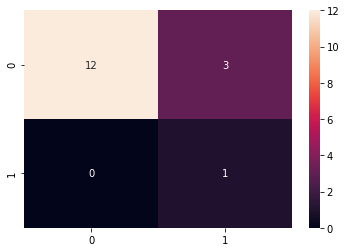

In [66]:
# plot the comfusion matrix  in the train set 
cf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf_matrix, annot=True)

In [70]:
# Evaluate on the training data
evaluate_print('KNN', y_test,y_test_pred)

KNN ROC:0.9, precision @ rank n:0.0
